In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Windows용 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

# 1. 데이터 시각화가 필요한 이유

- 앤스콤 4분할 그래프로 확인하기
    - 앤스콤 4분할 데이터는 각각 평균, 분산, 상관관계, 회귀선이 모두 같음
        - 따라서 수칫값만을 확인한다면 각각의 데이터는 모두 같다 라는 착각을 할 수 있음
        - 하지만 시각화하면 모든 데이터그룹들이 서로 다른 데이터 패턴을 가짐 

In [6]:
anscombe = sns.load_dataset("anscombe")

In [8]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [10]:
type(anscombe)

pandas.core.frame.DataFrame

In [12]:
anscombe.shape

(44, 3)

In [14]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [16]:
anscombe.groupby("dataset").agg(["mean", "std"])

x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579

In [18]:
dataset_1 = anscombe[anscombe["dataset"] == "I"]
dataset_2 = anscombe[anscombe["dataset"] == "II"]
dataset_3 = anscombe[anscombe["dataset"] == "III"]
dataset_4 = anscombe[anscombe["dataset"] == "IV"]

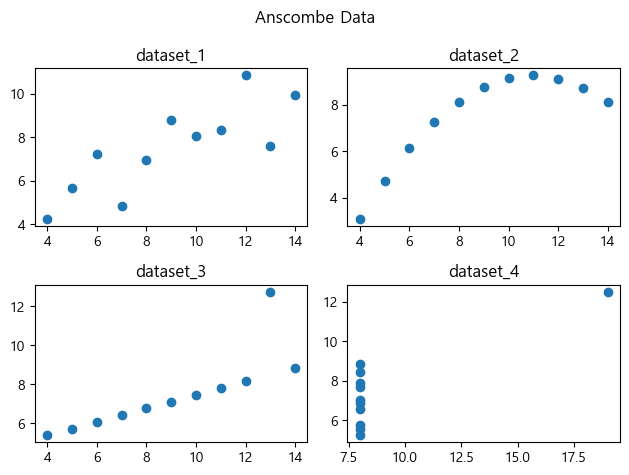

In [20]:
fig = plt.figure()

axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.plot(dataset_1["x"], dataset_1["y"], "o")
axes2.plot(dataset_2["x"], dataset_2["y"], "o")
axes3.plot(dataset_3["x"], dataset_3["y"], "o")
axes4.plot(dataset_4["x"], dataset_4["y"], "o")

axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig.suptitle("Anscombe Data")
fig.tight_layout()
plt.show()

# 2. 꺾은선 그래프

- 연속적으로 변화하는 데이터를 살펴보고자 할 때 주로 사용
    - 시간에 따른 데이터의 연속적인 변화량을 관찰할 때
        - 예) 시간에 따른 기온의 변화, 물을 끓인 다음 식히면서 시간에 따른 물의 온도 변화 등
- 수량을 점으로 표시하면서 선으로 이어 그리기 때문에 증가와 감소 상태를 쉽게 확인할 수 있음

In [23]:
df = pd.read_csv("./data/주요발생국가주간동향(4월2째주).csv")
df.head()

,국가,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
0,미국,335524,364723,387547,424945,461437,495535,524903
1,스페인,130709,135032,140510,146690,152446,157022,161852
2,이탈리아,128948,132547,135586,139422,143626,147577,152271
3,독일,100024,102453,107591,112113,118181,122171,124908
4,프랑스,70478,74390,78167,82048,86334,90276,93790


In [25]:
df = pd.read_csv("./data/주요발생국가주간동향(4월2째주).csv", index_col = "국가")
df.head()

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
미국,335524,364723,387547,424945,461437,495535,524903
스페인,130709,135032,140510,146690,152446,157022,161852
이탈리아,128948,132547,135586,139422,143626,147577,152271
독일,100024,102453,107591,112113,118181,122171,124908
프랑스,70478,74390,78167,82048,86334,90276,93790


### - 4월 6일 코로나 발생 건수 꺾은선 그래프

In [28]:
chartdata = df["4월06일"]
chartdata

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64

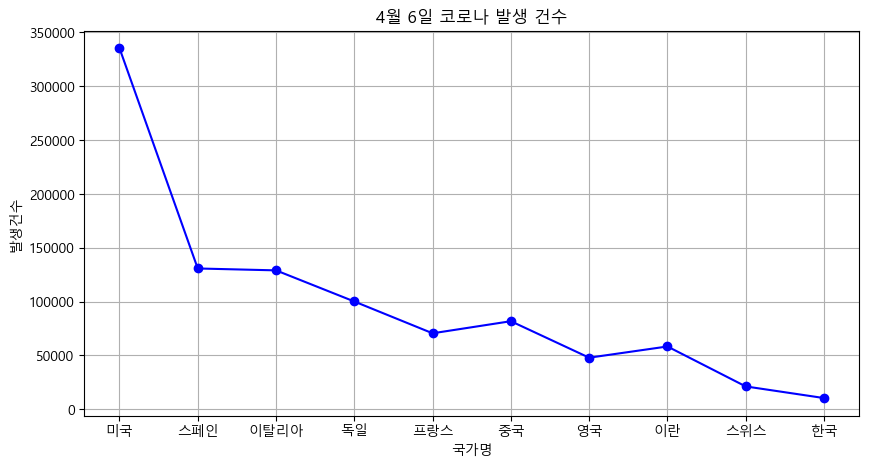

In [31]:
fig = plt.figure(figsize = (10, 5))

plt.plot(chartdata, "b-o")
plt.grid()
plt.xlabel("국가명")
plt.ylabel("발생건수")
plt.title("4월 6일 코로나 발생 건수")

plt.show()

### - 특정 기간에 대한 꺾은선 그래프 그리기

In [35]:
df.head()

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
미국,335524,364723,387547,424945,461437,495535,524903
스페인,130709,135032,140510,146690,152446,157022,161852
이탈리아,128948,132547,135586,139422,143626,147577,152271
독일,100024,102453,107591,112113,118181,122171,124908
프랑스,70478,74390,78167,82048,86334,90276,93790


In [37]:
chartdata = df.loc[["스페인", "프랑스", "독일", "중국", "영국", "이란"], :"4월10일"]
chartdata

,4월06일,4월07일,4월08일,4월09일,4월10일
국가,,,,,
스페인,130709,135032,140510,146690,152446
프랑스,70478,74390,78167,82048,86334
독일,100024,102453,107591,112113,118181
중국,81708,81740,81802,81865,81907
영국,47806,51608,55242,60733,65077
이란,58226,60500,62589,64586,66220


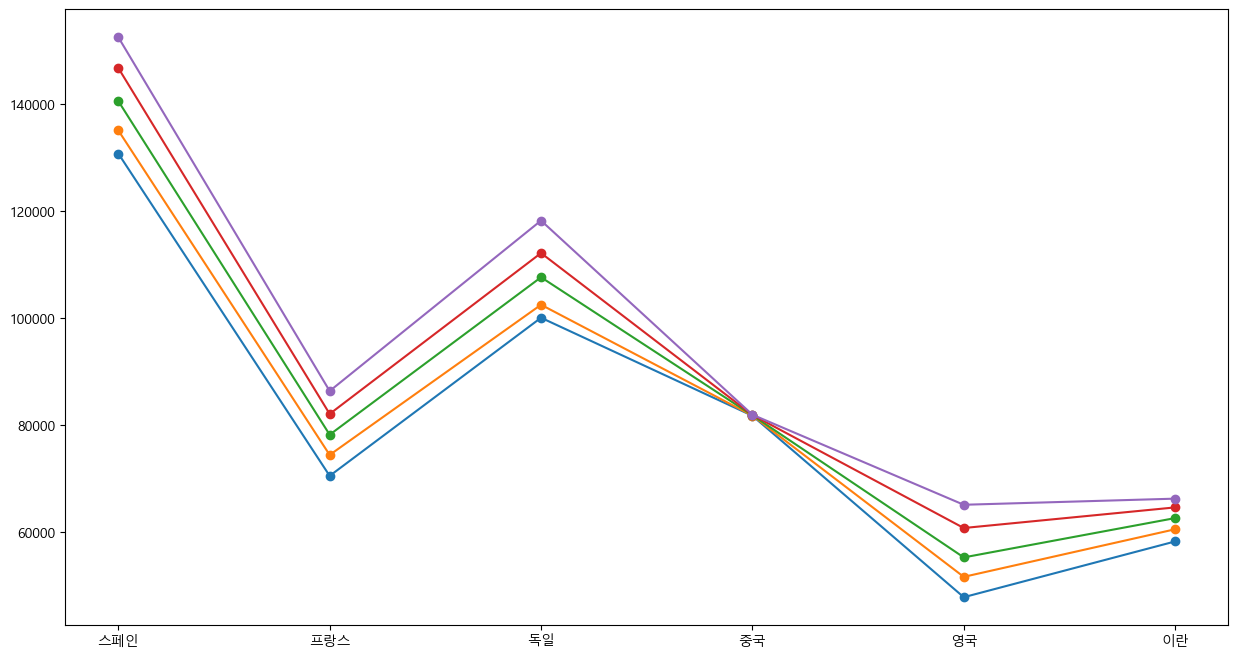

In [39]:
fig = plt.figure(figsize = (15, 8))
plt.plot(chartdata, marker = "o")
plt.show()

In [41]:
chartdata = df.loc[["스페인", "프랑스", "독일", "중국", "영국", "이란"], :"4월10일"]
chartdata = chartdata.T
chartdata

국가,스페인,프랑스,독일,중국,영국,이란
4월06일,130709,70478,100024,81708,47806,58226
4월07일,135032,74390,102453,81740,51608,60500
4월08일,140510,78167,107591,81802,55242,62589
4월09일,146690,82048,112113,81865,60733,64586
4월10일,152446,86334,118181,81907,65077,66220


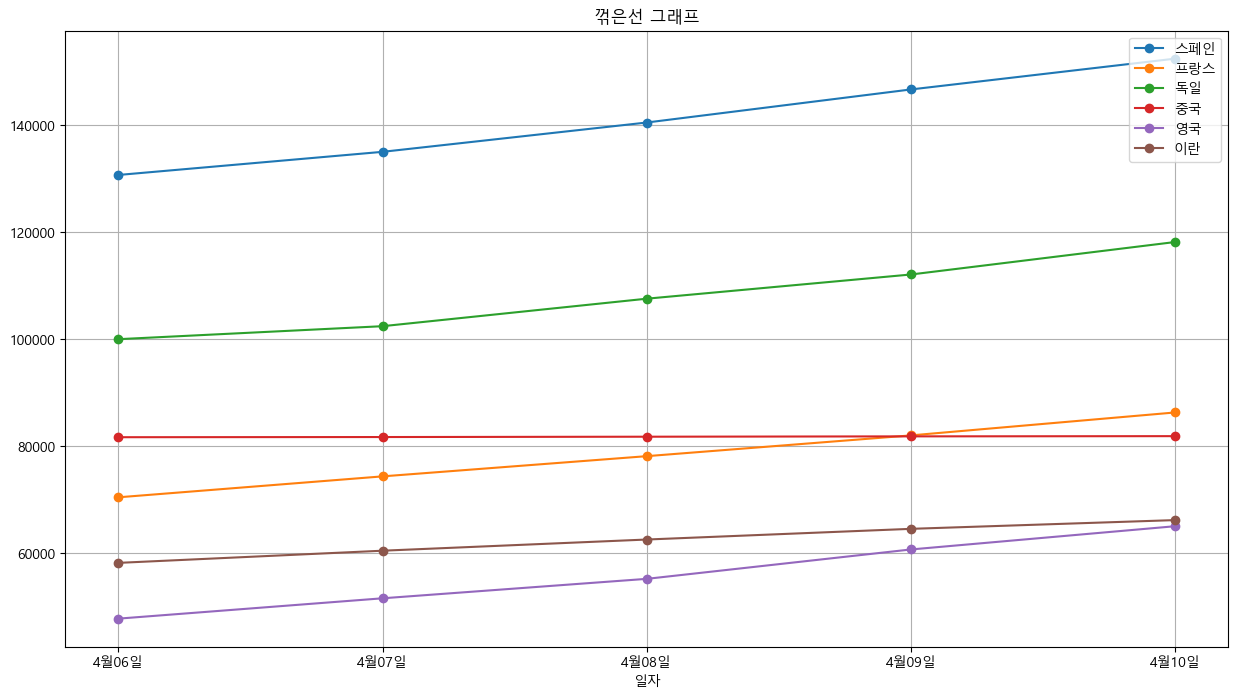

In [43]:
fig = plt.figure(figsize = (15, 8))

plt.plot(chartdata, marker = "o")
plt.legend(chartdata.columns, loc = "upper right")
plt.title("꺾은선 그래프")
plt.xlabel("일자")
plt.grid()

plt.show()

# 3. 막대 그래프

- 집단별 차이를 표현할 때 주로 사용
    - 크고 작음의 차이를 한 눈에 파악하기 위해
    - 예) 수량의 많고 적음 비교, 변화된 양에 대한 일별, 월별, 연별 통계 등의 비교 그래프
- 가독성 면에서 막대 그래프는 일반적으로 항목의 개수가 적으면 가로 막대가 보기 좋고, 항목이 많으면 세로 막대가 보기 편함

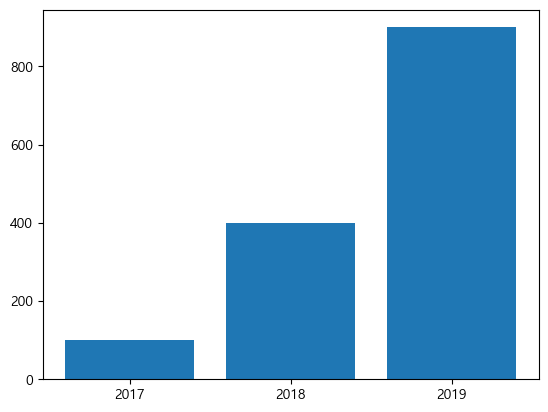

In [46]:
x = np.arange(3)
years = ["2017", "2018", "2019"]
values = [100, 400, 900]

plt.bar(x, values)
plt.xticks(x, years)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


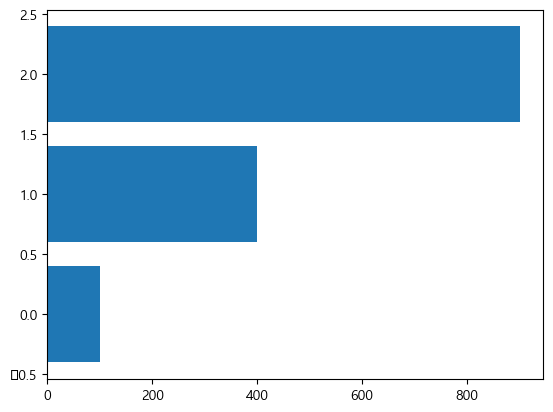

In [48]:
# 수평 막대 그래프
plt.barh(x, values)
plt.show()

# 4. 산점도

- 서로 다른 두 연속형 변수 사이의 관계를 나타내며 연속형 변수의 상관성을 확인할 때 산점도 그래프를 사용
    - 예) 나이와 소득에 대한 상호 관련성 파악
- 산점도에 표시되는 각 점들은 자료의 관측값을 의미하고, 각 점의 위치는 관측값이 가지는 x축, y축 변수의 값으로 결정됨

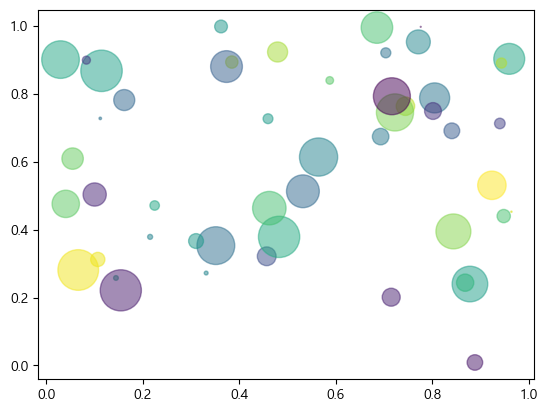

In [51]:
N = 50

x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N)) ** 2

plt.scatter(x, y, s = area, c = colors, alpha = 0.5)
plt.show()

### Tips) 데이터 산점도 그래프

In [54]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


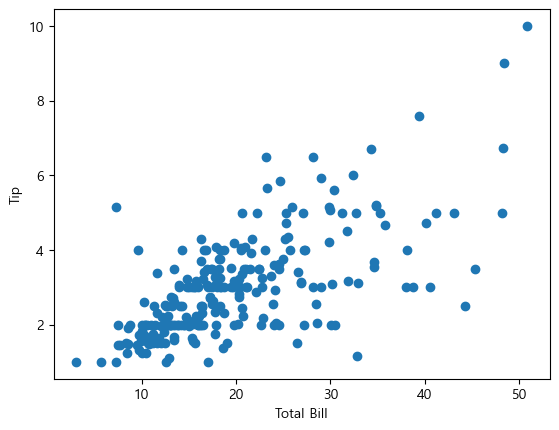

In [56]:
fig = plt.figure()

axes1 = fig.add_subplot(1, 1, 1)
axes1.scatter(tips["total_bill"], tips["tip"])

axes1.set_xlabel("Total Bill")
axes1.set_ylabel("Tip")

plt.show()

# 5. 히스토그램

- 변수가 하나인 데이터의 빈도수를 막대 모양으로 나타낼 때 사용
- 통계분석에서 히스토그램은 가장 많이 사용되는 도구로, 데이터의 분석 및 분포를 파악하는 역할을 함
- x축에는 계급, y축에는 해당 도수 및 비율(개수)을 지정
    - 계급은 변수의 구간을 의미
    - 서로 겹치지 않아야 하고 계급들은 서로 붙어 있어야 함

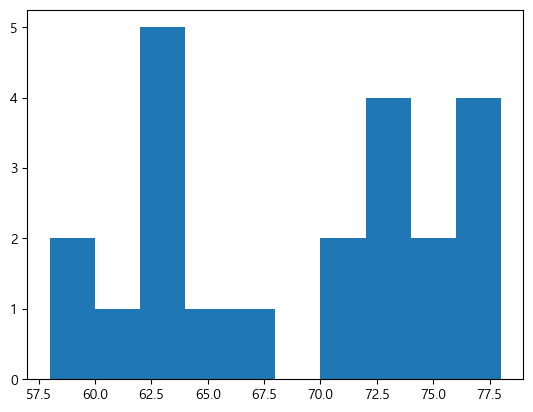

In [59]:
weight = np.random.randint(55, 80, 22)

plt.hist(weight)
plt.show()

### Tips) 히스토그램

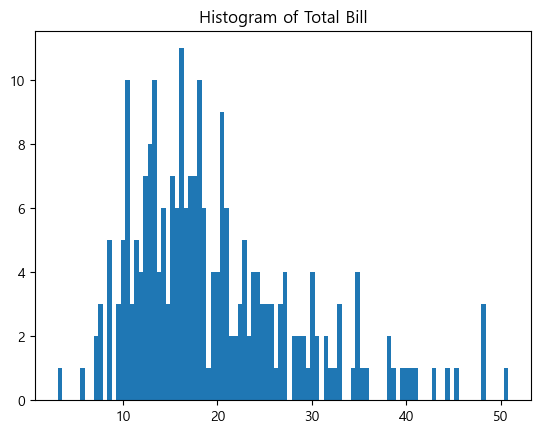

In [62]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)

axes1.hist(tips["total_bill"], bins = 100)
axes1.set_title("Histogram of Total Bill")
plt.show()

# 6. 파이차트

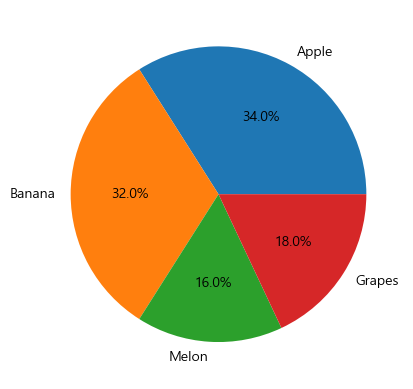

In [65]:
ratio = [34, 32, 16, 18]
labels = ["Apple", "Banana", "Melon", "Grapes"]

plt.pie(ratio, labels = labels, autopct = "%.1f%%")
plt.show()

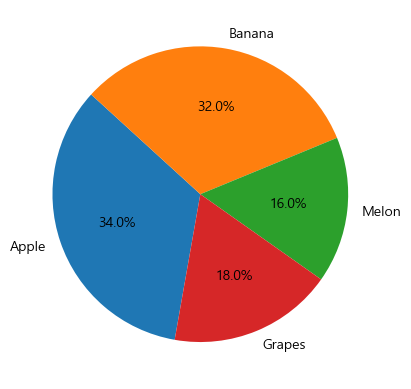

In [67]:
ratio = [34, 32, 16, 18]
labels = ["Apple", "Banana", "Melon", "Grapes"]

plt.pie(ratio, labels = labels, autopct = "%.1f%%", startangle = 260, counterclock = False)
plt.show()

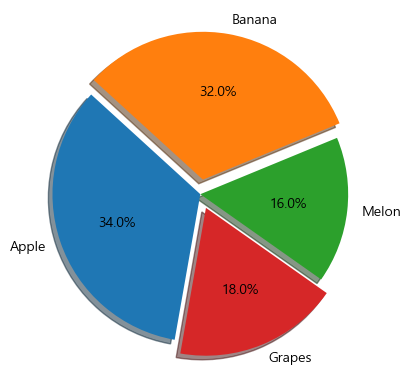

In [69]:
ratio = [34, 32, 16, 18]
labels = ["Apple", "Banana", "Melon", "Grapes"]
explode = [0, 0.1, 0, 0.1]

plt.pie(ratio, labels = labels, autopct = "%.1f%%", startangle = 260, counterclock = False,
        explode = explode, shadow = True)
plt.show()

# 7. 상자수염 그래프

- 데이터분호를 시각화하여 탐색

In [72]:
tips[tips["sex"] == "Female"]["tip"]

0      1.01
4      3.61
11     5.00
14     3.02
16     1.67
       ... 
226    2.00
229    2.88
238    4.67
240    2.00
243    3.00
Name: tip, Length: 87, dtype: float64

In [74]:
tips[tips["sex"] == "Male"]["tip"]

1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_17688\4016850365.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes1.boxplot([tips[tips["sex"] == "Female"]["tip"],


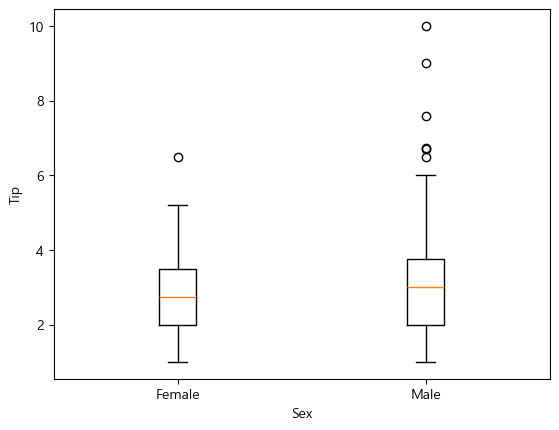

In [76]:
# 성별 별 팁의 분포
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)

axes1.boxplot([tips[tips["sex"] == "Female"]["tip"],
              tips[tips["sex"] == "Male"]["tip"]],
              labels = ["Female", "Male"])

axes1.set_xlabel("Sex")
axes1.set_ylabel("Tip")
plt.show()

# 8. seaborn

- matplotlib을 기반으로 다양한 테마와 통계용 차트 등의 동적인 기능을 추가한 시각화 라이브러리
- 통계와 관련된 차트를 제공하기 때문에 데이터프레임으로 다양한 통계 지표를 낼 수 있으며 데이터 분석에 활발히 사용되고 있음
- 실제 분석에서는 matplotlib과 seaborn 두 가지를 함께 사용
- seaborn은 기본적으로 matplotlib보다 제공하는 색상이 더 많기 때문에 색 표현력이 좋음

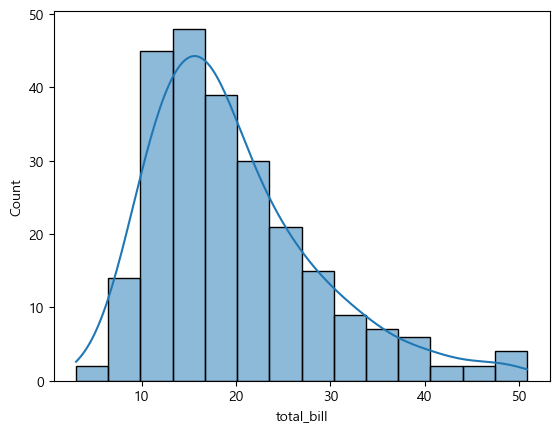

In [81]:
# 히스토그램
ax = plt.subplots()
ax = sns.histplot(tips["total_bill"], kde = True)   # kde : 밀집도 그래프 추가
plt.show()

In [83]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


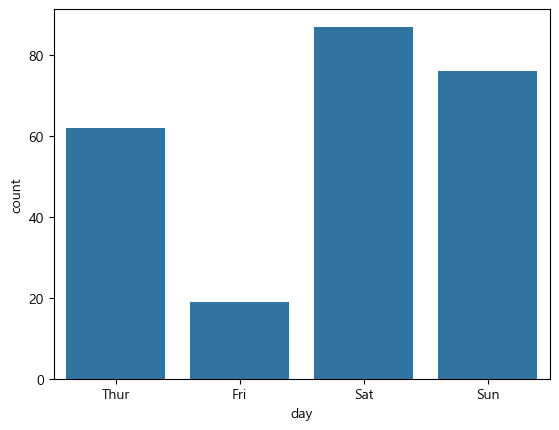

In [85]:
# count 그래프
ax = plt.subplots()
ax = sns.countplot(data = tips, x = "day")
plt.show()

In [87]:
tips["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

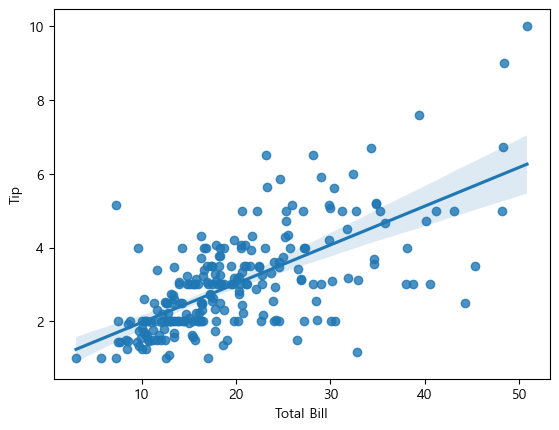

In [89]:
# 산점도 그래프
ax = plt.subplots()
ax = sns.regplot(x = "total_bill", y = "tip", data = tips)
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")
plt.show()

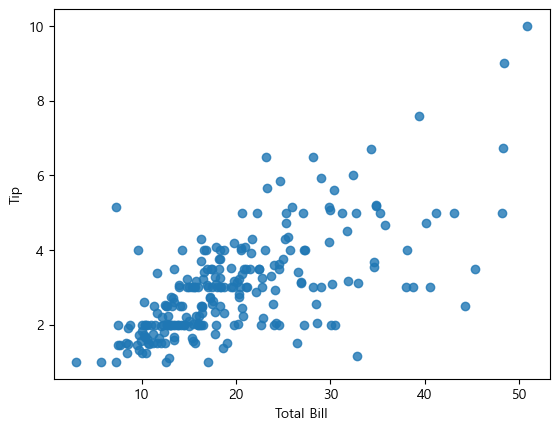

In [91]:
# 산점도 그래프 - 회귀선 미표시
ax = plt.subplots()
ax = sns.regplot(x = "total_bill", y = "tip", data = tips, fit_reg = False)
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")
plt.show()

# 9. 산점도와 히스토그램 한 번에 그리기

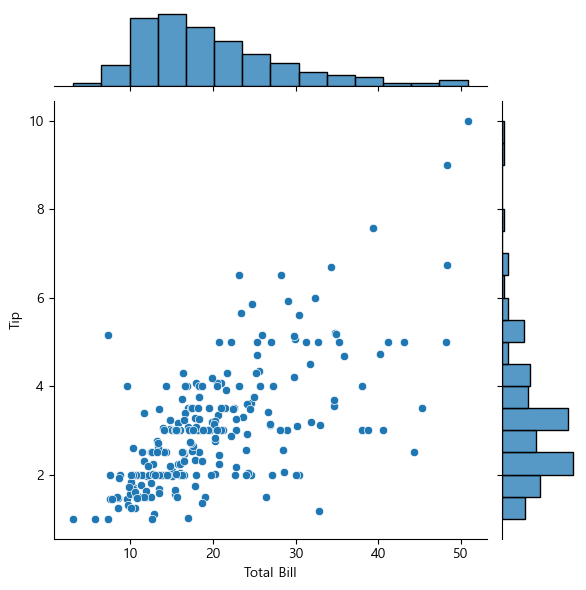

In [94]:
joint = sns.jointplot(x = "total_bill", y = "tip", data = tips)
joint.set_axis_labels(xlabel = "Total Bill", ylabel = "Tip")
plt.show()